In [1]:
# lpr_scregseg environment

# Preprocess PBMC from a Healthy Donor - Granulocytes Removed Through Cell Sorting (10k) from 10x (10k_sorted)

Aim: Derive identical feature set for additional ATAC data from other studies as for treatment-control use case.

Keep cells with annotation from MOFA+ vignette (passing all respective preprocessing).

In [2]:
import os
import pandas as pd
from anndata import read_h5ad
import scanpy as sc
import scregseg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import binarize

In [3]:
# Load GEX data

In [4]:
wd = "liam_manuscript_reproducibility/data/original/10x/10k_sorted/"

In [5]:
adata = sc.read_10x_h5(wd + "pbmc_granulocyte_sorted_10k_filtered_feature_bc_matrix.h5")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
adata

AnnData object with n_obs × n_vars = 11909 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

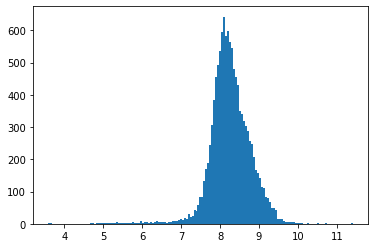

In [7]:
plt.hist(np.log(adata.X.sum(axis=1).flatten().tolist()[0]), bins="auto")
plt.show()

In [8]:
MOFA_10X_metadata = pd.read_csv('liam_manuscript_reproducibility/data/derived/MOFA+/MOFA_10X_metadata.csv', index_col=0)

In [9]:
MOFA_10X_metadata.index = MOFA_10X_metadata.index.map(lambda x: x + '-1')

In [10]:
MOFA_10X_metadata = MOFA_10X_metadata[MOFA_10X_metadata['pass_accQC']]

In [11]:
adata = adata[MOFA_10X_metadata.index].copy()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


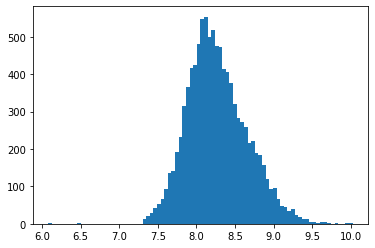

In [12]:
plt.hist(np.log(adata.X.sum(axis=1).flatten().tolist()[0]), bins="auto")
plt.show()

In [13]:
adata.obs = adata.obs.merge(MOFA_10X_metadata, left_index=True, right_index=True, how='inner')

In [14]:
# Load ATAC data

Previously we created same bins as input for ATAC model as for the treatment-control use case.

The atac data is already subsetted to those cells that are called cells by the cell ranger pipeline.

In [15]:
adata_DNA = sc.read_h5ad("liam_manuscript_reproducibility/data/derived/10x/10k_sorted/filtered_countmatrix_10k_sorted_informative_rarest_states_out_of_50_0.h5ad").T

Make DNA observations have same order as RNA observations! And subset to the same set of cells (reciprocally).

In [16]:
adata_DNA = adata_DNA[adata.obs.index[adata.obs.index.isin(adata_DNA.obs.index)],].copy()

In [17]:
adata = adata[adata.obs.index[adata.obs.index.isin(adata_DNA.obs.index)],].copy() 

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [18]:
# Binarize ATAC data

In [19]:
adata_DNA.X = binarize(adata_DNA.X, threshold=0.5)

In [20]:
adata.obsm["ATAC"] = adata_DNA.X.copy()

In [21]:
adata

AnnData object with n_obs × n_vars = 10032 × 36601
    obs: 'celltype', 'broad_celltype', 'pass_rnaQC', 'pass_accQC'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'ATAC'

In [22]:
adata.obs['batch'] = '10k_sorted_nuclei'

In [23]:
adata.write("liam_manuscript_reproducibility/data/derived/10x/10k_sorted/preprocessed_10k_sorted_nuclei.h5ad")

... storing 'celltype' as categorical
... storing 'broad_celltype' as categorical
... storing 'batch' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
